In [2]:
import pandas as pd
import string
import numpy as np

In [3]:
years = [i for i in range(1999,2016,2)]

folders = ['Demographics', 'Dietary', 'Exam', 'Lab', 'Questionnaire']

print(years)

letters = ['']+ list(string.ascii_uppercase)[1:len(years)]
print(letters)

[1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015]
['', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


In [4]:
def for_folder(name, letter, year):
    if year == 1999:
        return name
    return name+"_"+letter

In [12]:
dfs = []

for i, year in enumerate(years):
    
    print(year)
    letter = letters[i]
    
    demo_str = for_folder("DEMO",letter, year)
    diq_str = for_folder("DIQ",letter, year)
    if year == 1999:
        lab10am_str = for_folder("LAB10AM",letter, year)
    elif year < 2005:
        lab10am_str = for_folder("L10AM",letter, year)
    else:
        lab10am_str = for_folder("GLU",letter, year)
    mcq_str = for_folder("MCQ",letter, year)
    whq_str = for_folder("WHQ",letter, year)
    bpq_str = for_folder("BPQ",letter, year)
    paq_str = for_folder("PAQ",letter, year)
    smq_str = for_folder("SMQ",letter, year)
    alq_str = for_folder("ALQ",letter, year)
    bmx_str = for_folder("BMX",letter, year)
    
    demo = pd.read_csv('NHANES Data/Demographics/' + str(year) + '/' + demo_str + '.csv')
    demo.rename(columns={demo_str + '.SEQN':'SEQN'}, inplace=True)
    # print(demo)
    if year <= 2005:
        demo = demo[['SEQN',demo_str +'.RIDAGEYR',demo_str +'.RIAGENDR',demo_str +'.RIDRETH1',demo_str +'.DMDEDUC2',
                 demo_str +'.INDHHINC']]
    else:
        demo = demo[['SEQN',demo_str +'.RIDAGEYR',demo_str +'.RIAGENDR',demo_str +'.RIDRETH1',demo_str +'.DMDEDUC2',
                 demo_str +'.INDHHIN2']]
    # print(demo)

    ques = pd.read_csv('NHANES Data/Questionnaire/' + str(year) + '/' + diq_str + '.csv')
    ques.rename(columns={diq_str + '.SEQN':'SEQN'}, inplace=True)
    ques = ques[['SEQN',diq_str + '.DIQ010']]
    # print(ques)

    lab = pd.read_csv('NHANES Data/Lab/' + str(year) + '/' + lab10am_str + '.CSV')
    #LAB10AM.LBXGLU
    lab.rename(columns={lab10am_str+ '.SEQN':'SEQN'}, inplace=True)
    lab = lab[['SEQN', lab10am_str+ '.LBXGLU']]
    # print(lab)

    q_mcq = pd.read_csv('NHANES Data/Questionnaire/' + str(year) +'/' + mcq_str +'.CSV')
    #MCQ.MCQ250A
    q_mcq.rename(columns={mcq_str +'.SEQN':'SEQN'}, inplace=True)
    if year < 2005:
        q_mcq = q_mcq[['SEQN', mcq_str +'.MCQ250A']]
    else:
        q_mcq = q_mcq[['SEQN', mcq_str +'.MCQ300C']]
    # print(q_mcq)

    q_whq = pd.read_csv('NHANES Data/Questionnaire/' + str(year) + '/' + whq_str +'.CSV')
    q_whq.rename(columns={whq_str +'.SEQN':'SEQN'}, inplace=True)
    q_whq = q_whq[['SEQN', whq_str +'.WHD010',whq_str +'.WHD020']]
    # print(q_whq)

    q_bpq = pd.read_csv('NHANES Data/Questionnaire/' + str(year) + '/' + bpq_str + '.CSV')
    q_bpq.rename(columns={bpq_str + '.SEQN':'SEQN'}, inplace=True)
    q_bpq = q_bpq[['SEQN', bpq_str + '.BPQ020']]
    # print(q_bpq)

#     q_paq = pd.read_csv('NHANES Data/Questionnaire/' + str(year) + '/' + paq_str + '.CSV')
#     q_paq.rename(columns={paq_str + '.SEQN':'SEQN'}, inplace=True)
#     q_paq = q_paq[['SEQN', paq_str + '.PAQ590']]
    # print(q_paq)

    q_smq = pd.read_csv('NHANES Data/Questionnaire/' + str(year) + '/' + smq_str + '.CSV')
    q_smq.rename(columns={smq_str + '.SEQN':'SEQN'}, inplace=True)
    q_smq = q_smq[['SEQN', smq_str + '.SMQ020']]
    # print(q_smq)

    q_alq = pd.read_csv('NHANES Data/Questionnaire/' + str(year) + '/' + alq_str + '.CSV')
    q_alq.rename(columns={alq_str + '.SEQN':'SEQN'}, inplace=True)
    if year == 1999:
        q_alq = q_alq[['SEQN', alq_str + '.ALQ100']]
    elif year == 2001:
        q_alq = q_alq[['SEQN', alq_str + '.ALD100']]
    else:
        q_alq = q_alq[['SEQN', alq_str + '.ALQ101']]
    # print(q_alq)

    exam = pd.read_csv('NHANES Data/Exam/' + str(year) + '/' + bmx_str + '.CSV')
    exam.rename(columns={bmx_str + '.SEQN':'SEQN'}, inplace=True)
    exam = exam[['SEQN', bmx_str + '.BMXWAIST',bmx_str + '.BMXBMI']]
    # print(exam)

    arr = [demo, ques, lab, q_mcq,q_whq,q_bpq, 
#            q_paq,
           q_smq, q_alq, exam]
    
    df = demo
    for i in range(1, len(arr)):
        df = pd.merge(df, arr[i], on=['SEQN'])

#     print(df)
    
    dfs.append(df)

1999
2001
2003
2005
2007
2009
2011
2013
2015


In [13]:
columns = list(dfs[0].columns)
print(columns)

['SEQN', 'DEMO.RIDAGEYR', 'DEMO.RIAGENDR', 'DEMO.RIDRETH1', 'DEMO.DMDEDUC2', 'DEMO.INDHHINC', 'DIQ.DIQ010', 'LAB10AM.LBXGLU', 'MCQ.MCQ250A', 'WHQ.WHD010', 'WHQ.WHD020', 'BPQ.BPQ020', 'SMQ.SMQ020', 'ALQ.ALQ100', 'BMX.BMXWAIST', 'BMX.BMXBMI']


In [14]:
for i in range(1,len(dfs)):
    dfs[i].columns = columns
    
# print(dfs)

combined = dfs[0]

for i in range(1,len(dfs)):
    combined = combined.append(dfs[i])
    
combined.reset_index()
combined.index = range(len(combined.index))
print(combined)

combined.to_csv('combined.csv',index = False)

        SEQN  DEMO.RIDAGEYR  DEMO.RIAGENDR  DEMO.RIDRETH1  DEMO.DMDEDUC2  \
0          2             77              1              3            5.0   
1          5             49              1              3            5.0   
2          7             59              2              4            2.0   
3         10             43              1              4            3.0   
4         12             37              1              3            4.0   
5         15             38              2              3            5.0   
6         20             23              2              1            1.0   
7         25             42              2              3            4.0   
8         29             62              1              3            3.0   
9         34             38              2              4            3.0   
10        46             85              2              4            2.0   
11        55             61              2              2            5.0   
12        57

In [53]:
combined = pd.read_csv('combined.csv')

In [54]:
combined.fillna(0, inplace=True)
print(combined)

       SEQN  DEMO.RIDAGEYR  DEMO.RIAGENDR  DEMO.RIDRETH1  DEMO.DMDEDUC2  \
0         2             77              1              3            5.0   
1         5             49              1              3            5.0   
2         7             59              2              4            2.0   
3        10             43              1              4            3.0   
4        12             37              1              3            4.0   
5        15             38              2              3            5.0   
6        20             23              2              1            1.0   
7        25             42              2              3            4.0   
8        29             62              1              3            3.0   
9        34             38              2              4            3.0   
10       46             85              2              4            2.0   
11       55             61              2              2            5.0   
12       57             3

In [4]:
combined.describe(include='all')

,SEQN,DEMO.RIDAGEYR,DEMO.RIAGENDR,DEMO.RIDRETH1,DEMO.DMDEDUC2,DEMO.INDHHINC,DIQ.DIQ010,LAB10AM.LBXGLU,MCQ.MCQ250A,WHQ.WHD010,WHQ.WHD020,BPQ.BPQ020,PAQ.PAQ180,SMQ.SMQ020,ALQ.ALQ100,BMX.BMXWAIST,BMX.BMXBMI
count,6943.000000,6943.000000,6943.000000,6943.00000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000,6943.000000
mean,15599.313553,50.039608,1.527438,2.76163,3.134236,6.487541,1.915166,98.910615,1.649863,269.250036,844.896442,1.675645,2.025061,1.519660,1.227423,92.800749,27.421691
std,8988.456759,19.020975,0.499283,1.11086,1.359628,6.193470,0.329792,42.376407,1.154440,1406.028735,7772.151854,0.564425,0.841488,0.553539,0.599133,24.886287,7.797425
min,2.000000,20.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7759.500000,34.000000,1.000000,2.00000,2.000000,3.000000,2.000000,87.800000,1.000000,63.000000,145.000000,1.000000,1.000000,1.000000,1.000000,85.000000,23.720000
50%,15632.000000,48.000000,2.000000,3.00000,3.000000,6.000000,2.000000,95.600000,2.000000,66.000000,170.000000,2.000000,2.000000,2.000000,1.000000,95.600000,27.080000
75%,23295.500000,65.000000,2.000000,3.00000,4.000000,9.000000,2.000000,105.000000,2.000000,70.000000,198.000000,2.000000,2.000000,2.000000,2.000000,105.900000,31.195000
max,31124.000000,85.000000,2.000000,5.00000,9.000000,99.000000,9.000000,587.300000,9.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000,9.000000,169.700000,66.440000


In [75]:
data = combined.drop(['SEQN'], axis=1)
data = data[data['DIQ.DIQ010'] != 9]
data = data[data['DIQ.DIQ010'] != 3]

# print(data)
Y = data['DIQ.DIQ010'].tolist()
Y = [int(y) for y in Y]
# print(len(Y))
Y = np.array(Y)
print(Y.shape)

X = data.drop(['DIQ.DIQ010'],axis=1).as_matrix()

# print(X)
print(X.shape)

(6862,)
(6862, 15)


In [57]:
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import itertools
from scipy import interp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [6]:
#taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        pass
         #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [7]:
# a general purpose function to run different models and evaluate performance

def crossval_evaluate_model(model, X, y, title_plot='Confusion matrix'):
    print("Cross validating model using 5-fold Stratified cross validation...")
    #model.fit(X,y)

    y_preds = cross_val_predict(model, X, y, cv=StratifiedKFold(random_state=42),
                               n_jobs=-1,  method='predict', verbose=2)
    
    classes_names = np.unique(y)
    #print(classes_names)
#     y_preds_indices = np.argmax(y_probas, axis=1) #horizontally, max index in each row
#     y_preds = classes_names[y_preds_indices]
    #print(np.unique(y_preds))
    
#     logloss = log_loss(y,y_probas)
    acc = accuracy_score(y, y_preds)
#     prec = precision_score(y,y_preds)
#     recall = recall_score(y,y_preds)

#     prec, recall, fscore, support = score(y, y_preds)
    
#     print("Log loss: ", logloss)
    print("Accuracy: ", acc)
    
#     print("Precision: ", prec)
#     print("Recall: ", recall)
#     print("F-score: ", fscore)
#     print("Support: ", support)

# The reported averages are a prevalence-weighted macro-average across classes
# (equivalent to precision_recall_fscore_support with average='weighted').

    print(classification_report(y,y_preds,target_names= [str(i) for i in classes_names]))
    
    cnf_matrix = confusion_matrix(y, y_preds)
    np.set_printoptions(precision=2)
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes_names,
                      title=title_plot)
    #plt.savefig(title_plot + ".png")
    return model

In [77]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

def plot_auc_roc(X, y):
    # Run classifier with cross-validation and plot ROC curves
    random_state = 42
    cv = StratifiedKFold(n_splits=5)
#     classifier = svm.SVC(kernel='linear', probability=True,
#                          random_state=random_state)

    classifier = SGDClassifier(loss='log')
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    plt.figure(figsize=(10,10))
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        print("Completed fold no. ", i+1)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test]-1, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [71]:
def auc_roc_multiclass(X, y):
    random_state=42
    # Learn to predict each class against the other
    y = label_binarize(y, classes=[0, 1])
    n_classes = y.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)
    classifier = OneVsRestClassifier(SGDClassifier(loss='log',
                                     random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#     n_classes = len(np.unique(y))
    print(n_classes)
    print(y_score.shape)
    print(y_test.shape)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
#     plt.figure()
#     # Compute macro-average ROC curve and ROC area

#     # First aggregate all false positive rates
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#     # Then interpolate all ROC curves at this points
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#     # Finally average it and compute AUC
#     mean_tpr /= n_classes

#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#     # Plot all ROC curves
#     plt.figure()
#     plt.plot(fpr["micro"], tpr["micro"],
#              label='micro-average ROC curve (area = {0:0.2f})'
#                    ''.format(roc_auc["micro"]),
#              color='deeppink', linestyle=':', linewidth=4)

#     plt.plot(fpr["macro"], tpr["macro"],
#              label='macro-average ROC curve (area = {0:0.2f})'
#                    ''.format(roc_auc["macro"]),
#              color='navy', linestyle=':', linewidth=4)

#     colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
#     for i, color in zip(range(n_classes), colors):
#         plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                  label='ROC curve of class {0} (area = {1:0.2f})'
#                  ''.format(i, roc_auc[i]))

#     plt.plot([0, 1], [0, 1], 'k--', lw=lw)
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Some extension of Receiver operating characteristic to multi-class')
#     plt.legend(loc="lower right")
#     plt.show()

2
(2777, 2)
(2777, 2)


C:\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


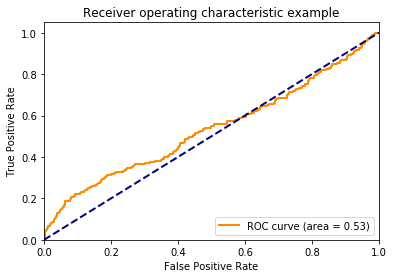

In [72]:
auc_roc_multiclass(X,Y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Completed fold no.  1
Completed fold no.  2
Completed fold no.  3
Completed fold no.  4
Completed fold no.  5


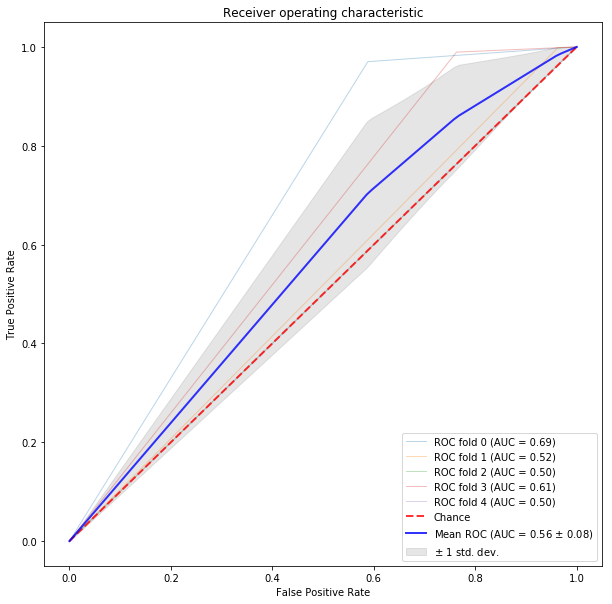

In [79]:
plot_auc_roc(X,Y)

Cross validating model using 5-fold Stratified cross validation...


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy:  0.891545441452
             precision    recall  f1-score   support

          1       0.51      0.25      0.33       676
          2       0.91      0.97      0.94      6186
          3       0.05      0.01      0.02        80
          9       0.00      0.00      0.00         1

avg / total       0.86      0.89      0.87      6943



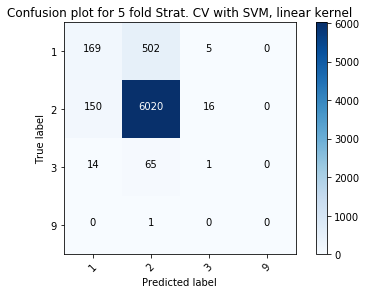

In [19]:
model = svm.LinearSVC()
model = crossval_evaluate_model(model,X,Y,'Confusion plot for 5 fold Strat. CV with SVM, linear kernel')